In [1]:
import pandas as pd
import numpy as np
import shmapy

### Shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input1.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,AK,0.320201
1,AL,0.591223
2,AR,0.331506
3,AZ,0.560050
4,CA,0.113140


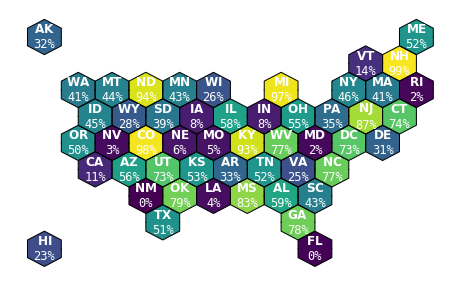

In [3]:
shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    figsize=(8,5),
    size=12,
    out_path='../img/hex_out_demo1_choropleth_clean.png'
)

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,AK,0.320201,Banana,32%
1,AL,0.591223,Cherry,59%
2,AR,0.331506,Durian,33%
3,AZ,0.560050,Durian,56%
4,CA,0.113140,Banana,11%


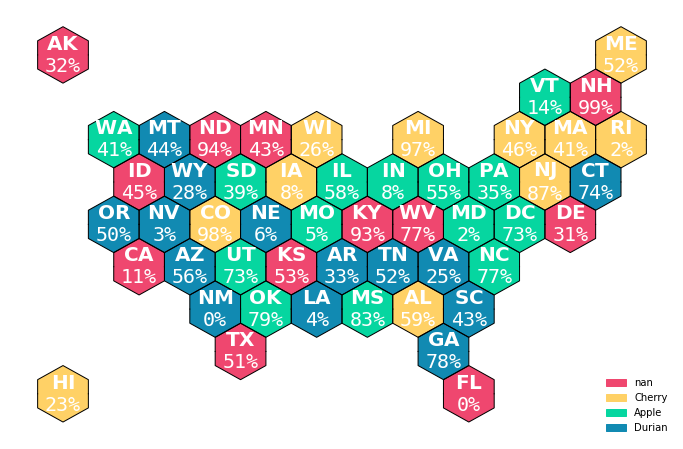

In [5]:
category_labels = {
    'Banana':'red',
    'Cherry': 'blue',
    'Apple': 'green',
    'Durian': 'purple'
}

shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    category_labels=['Banana','Cherry', 'Apple','Durian'],
    fill_color = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2'],
    figsize=(12, 8)
)

/Users/marshall.krassenstein/opt/anaconda3/envs/shmap_test/lib/python3.9/site-packages/shmapy/input.py:47: UserWarning: 
        Expected input should only include 50 or 51 states. 
        Missing values will be filled in with missing_* keyword arguments
         
  warnings.warn(


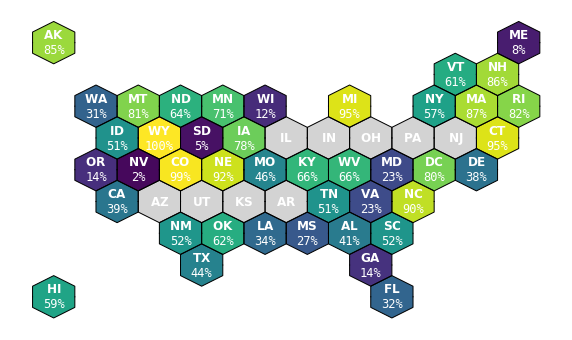

In [6]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])

shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    missing_text_color= 'white',
    missing_fill_color = 'lightgrey',
#     text_color='black',
    figsize=(10,6),
    size=12
)


## Facet Shmap

In [7]:
import matplotlib.pyplot as plt
import shmapy.facet_shmap

states = pd.DataFrame(np.repeat(list(shmapy.facet_shmap.get_state_coordinates()['code']), 20)).rename(columns={0:'state'})

states['x'] = np.random.random(states.shape[0])
states['y'] = np.random.random(states.shape[0]) + (1 * states.index)
states['color'] = np.random.choice(['#ef476f', '#ffd166', '#06d6a0', '#118ab2'], states.shape[0])
pa = states.loc[states.state=='PA']

### First define a plotting function that takes a subplot axis as it's first argument

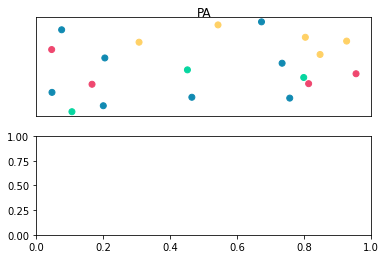

In [8]:
fig, ax = plt.subplots(2,1)

def scatter_a_state(ax, df):
    
    state_name = list(df.state)[0]
    
    ax.scatter(df.x, df.y, color=df.color,)
    ax.set_title(state_name,loc='center', size=12, y=.95)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    
    
scatter_a_state(ax[0], pa)

### Then throw it into facet_plot_us

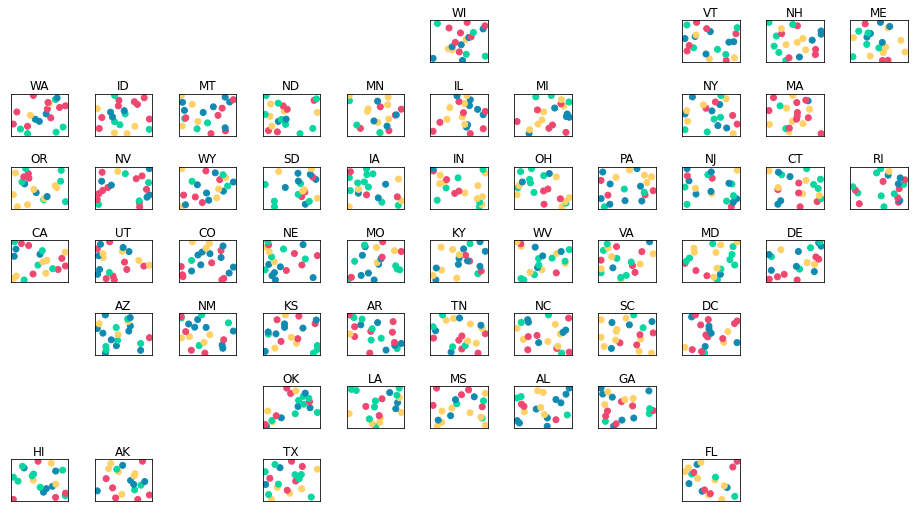

In [9]:
shmapy.facet_shmap.facet_plot_us(states, scatter_a_state, facet_col='state', figsize=(14,8), out_path='../img/facet_shmap_output_1.png')

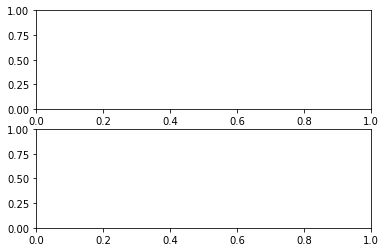

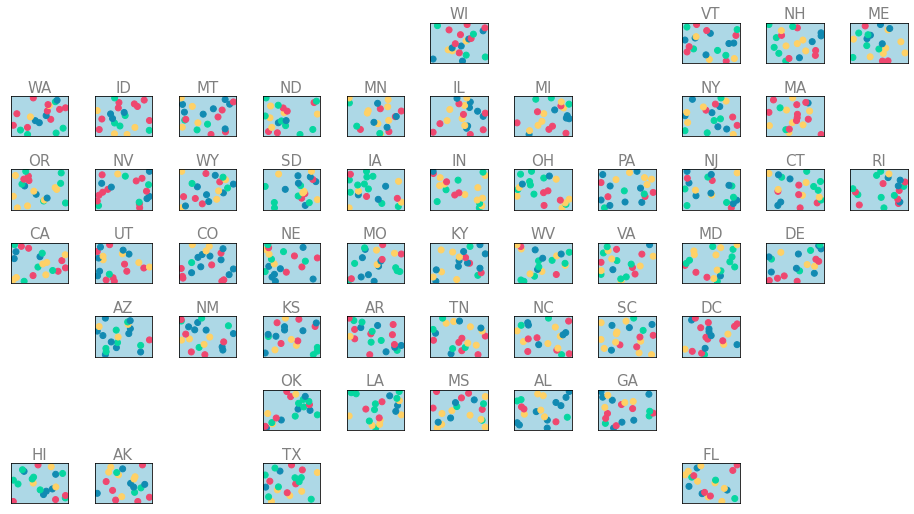

In [11]:
import matplotlib
fig, ax = plt.subplots(2,1)

def scatter_a_state_again(ax, df):
    
    state_name = list(df.state)[0]
    
    ax.scatter(df.x, df.y, color=df.color,)
    ax.set_title(state_name,loc='center', size=15, y=.95, color='grey')
    
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_facecolor("lightblue")

    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    

shmapy.facet_shmap.facet_plot_us(
    states, scatter_a_state_again,
    facet_col='state', figsize=(14,8), 
    out_path='../img/facet_shmap_output_1.png')